### **Importing the libraries and reading in the data**



In [ ]:
#Importing the libraries required for this project.  

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline


In [ ]:
#Adjusting the configuration of the plots.

matplotlib.rcParams['figure.figsize'] = (12,8) 


In [ ]:
#Reading in the data.
 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/movies.csv')



### **Exploring the data**

In [ ]:
#Reviewing the data.

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
#Reviewing the data types in each column.

df.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
#Reviewing the columns for any missing data. 

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, pct_missing))
  

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%



###  **Cleaning the data** 

In [ ]:
#Dropping all rows with missing data.

df = df.dropna()


In [ ]:
#Converting the datatypes for the 'budget', 'gross' and 'votes' columns from a float to an integer.

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')


In [ ]:
#Extracting the correct year from the 'released' column to populate the new 'yearcorrect' column.

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)



### **Analysing the data**

In [ ]:
#Sorting the rows by the highest-grossing films in descending order. 

df.sort_values(by=['gross'], inplace=True, ascending=False)
top_10 = df.head(10)
print(top_10)


                                            name rating      genre  year  \
5445                                      Avatar  PG-13     Action  2009   
7445                           Avengers: Endgame  PG-13     Action  2019   
3045                                     Titanic  PG-13      Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                      Avengers: Infinity War  PG-13     Action  2018   
7480                               The Lion King     PG  Animation  2019   
6653                              Jurassic World  PG-13     Action  2015   
6043                                The Avengers  PG-13     Action  2012   
6646                                   Furious 7  PG-13     Action  2015   
7494                                   Frozen II     PG  Animation  2019   

                               released  score    votes         director  \
5445  December 18, 2009 (United States)    7.8  1100000    James Cameron   
7445     Ap

In [ ]:
#Viewing the distinct values in the 'company' column. 

company_list = df['company'].drop_duplicates().sort_values(ascending=False)
top_10_companies = company_list.head(10)
print(top_10_companies)


7129                        thefyzz
5664                    micro_scope
4007                       i5 Films
6793                     i am OTHER
6420                           erbp
3776                 double A Films
3330    Zucker Brothers Productions
520                Zoetrope Studios
2213             Zeta Entertainment
3698        Zentropa Entertainments
Name: company, dtype: object



### **Visualising the data: Budget vs Gross Earnings Correlation Analysis** 

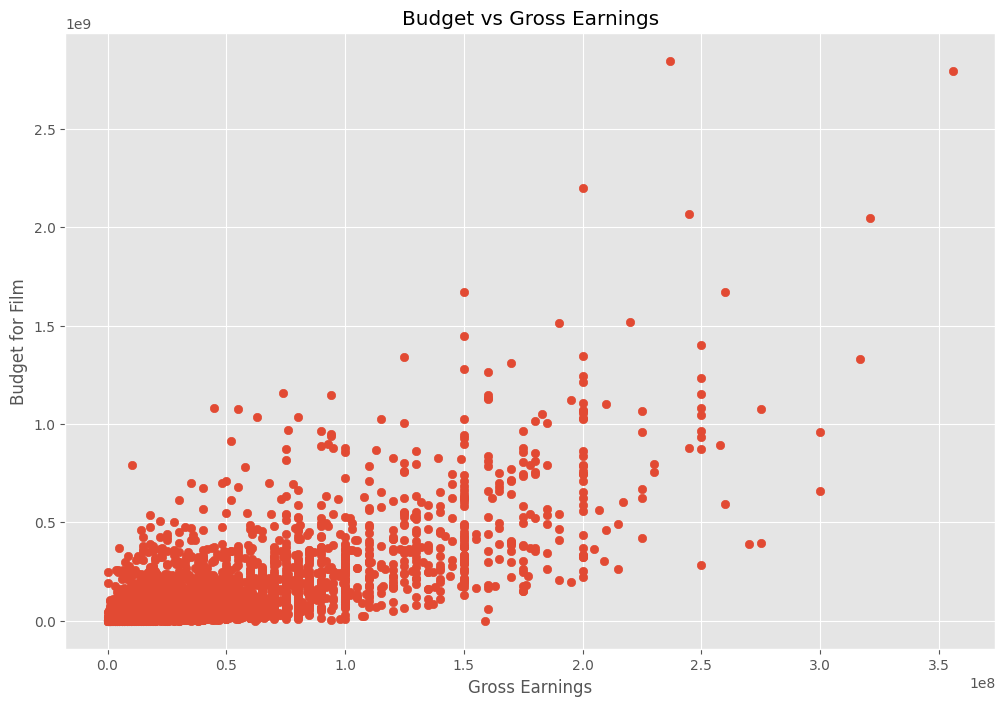

In [ ]:
#Correlation analysis with a scatter plot.

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

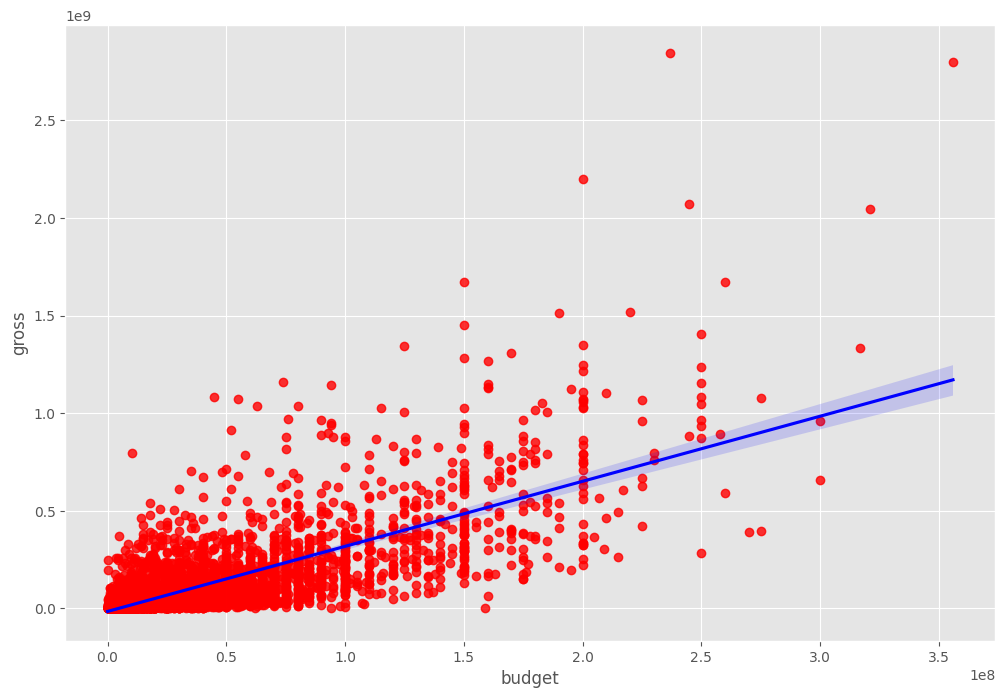

In [ ]:
#Drawing the line of best fit to understand how closely correlated the variables are. 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})



### **Correlation Co-efficient Matrix**

In [ ]:
#Generating a correlation co-efficient matrix using the Pearson Correlation method. 

df.corr(method='pearson', numeric_only=True)


,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


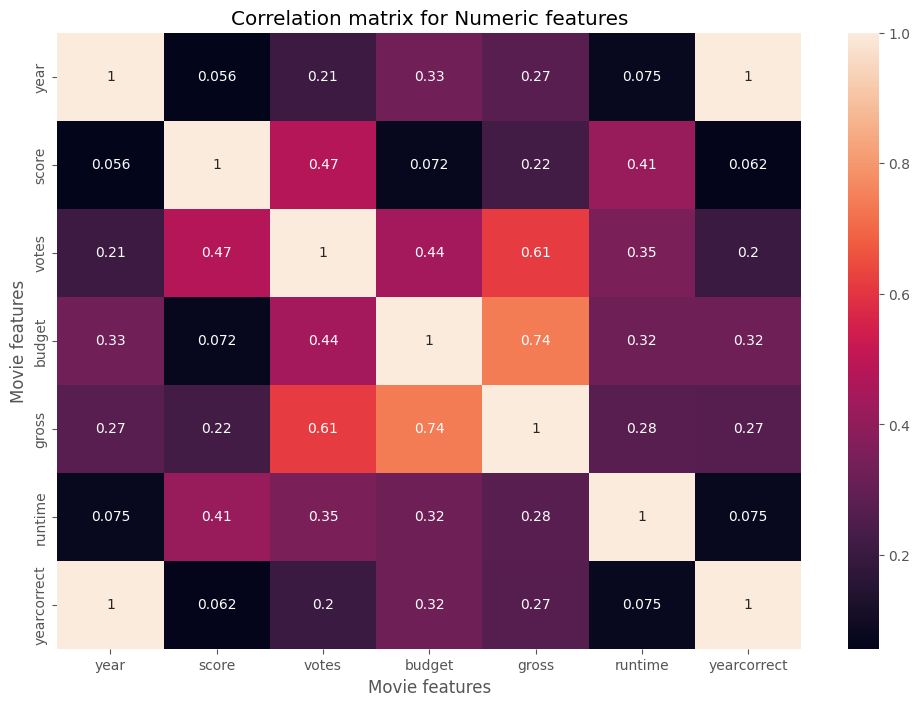

In [ ]:
#Visualising the correlation matrix.

correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for Numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()


In [ ]:
#Reviewing the first few rows of the 'df' dataframe.

df.head ()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [ ]:
#Converting any columns with categorical data into numerical codes using the .astype('category') and .cat.codes methods from pandas.

df_numerized = df

#Iterate through each column name in the DataFrame using for col_name in df_numerized.columns.
for col_name in df_numerized.columns:
#Check if the dtype of the current column is object, which typically indicates string or categorical data, using if(df_numerized[col_name].dtype == 'object').
  if(df_numerized[col_name].dtype == 'object'): 
#If the dtype is indeed object, convert the column to a pandas category using df_numerized[col_name] = df_numerized[col_name].astype('category').
    df_numerized[col_name] = df_numerized[col_name].astype('category')
#Replacing the categorical values with numerical codes using df_numerized[col_name] = df_numerized[col_name].cat.codes.
    df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149.0,2018


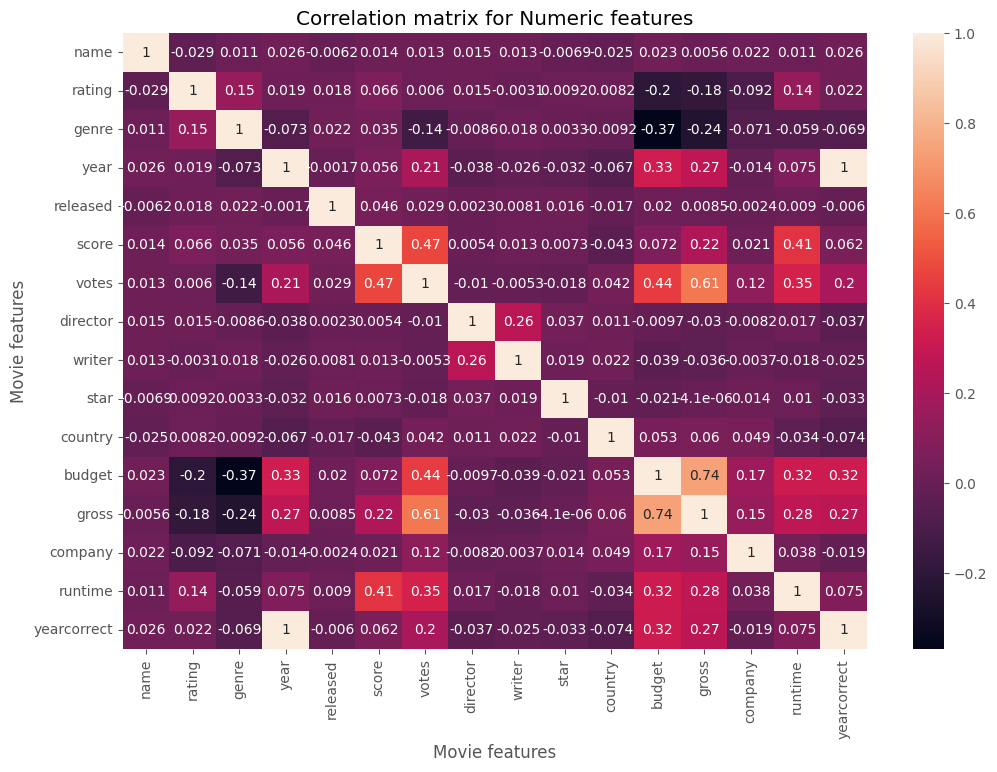

In [ ]:
#Visualising the correlation matrix with all movie features included.

correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation matrix for Numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')

plt.show()


In [ ]:
#Comparing all possible pairs of correlations between two variables in rows.

correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs


name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
 

In [ ]:
#Sorting the corr_pairs series by the absolute correlation coefficient value in descending order. 

sorted_pairs = corr_pairs.abs().sort_values(ascending=False)

sorted_pairs


name         name           1.000000
rating       rating         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
yearcorrect  yearcorrect    1.000000
year         yearcorrect    0.998726
yearcorrect  year           0.998726
gross        budget         0.740247
budget       gross          0.740247
gross        votes          0.614751
votes        gross          0.614751
score        votes          0.474256
votes        score          0.474256
budget       votes          0.439675
votes        budget         0.439675
runtime      score          0.414068
s


### **Refining the Correlation Analysis**

In [ ]:
#Filtering out the pairs where the two index values are the same.

# Get all correlation pairs
corr_pairs = correlation_mat.unstack()

# Filter out matching pairs
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Sort by absolute correlation coefficient
sorted_pairs = corr_pairs.abs().sort_values(ascending=False)

# Print the top 10 pairs
print(sorted_pairs.head(10))


year         yearcorrect    0.998726
yearcorrect  year           0.998726
gross        budget         0.740247
budget       gross          0.740247
votes        gross          0.614751
gross        votes          0.614751
votes        score          0.474256
score        votes          0.474256
votes        budget         0.439675
budget       votes          0.439675
dtype: float64


In [ ]:
#Filtering out the pairs where the correlation is below 0.5. 

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr


year         yearcorrect    0.998726
yearcorrect  year           0.998726
gross        budget         0.740247
budget       gross          0.740247
votes        gross          0.614751
gross        votes          0.614751
dtype: float64